In [ ]:
from google.colab import files
files.upload()

In [2]:
import pandas as pd

sub=pd.read_csv('sub.csv')
sub_2=pd.read_csv('sub_2.csv')
sub_mljar=pd.read_csv('sub_mljar.csv')
sub_mljar_2=pd.read_csv('sub_mljar_2.csv')

In [17]:
import matplotlib.pyplot as plt

def make_piechart(df):
  zero=len(df.loc[df['target']==0].index)
  one=len(df.loc[df['target']==1].index)
  ratio=[zero, one]
  labels=['target_0', 'target_1']
  plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)

In [18]:
sub['target'].value_counts()

0    36437
1     9967
Name: target, dtype: int64

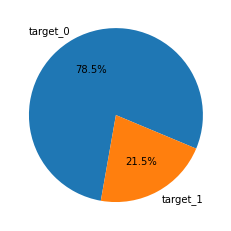

In [19]:
make_piechart(sub)

- score: 0.4150

In [20]:
sub_2['target'].value_counts()

0    29257
1    17147
Name: target, dtype: int64

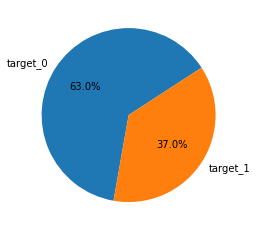

In [21]:
make_piechart(sub_2)

- score: 0.4996

In [6]:
sub_mljar['target'].value_counts()

0    41352
1     5052
Name: target, dtype: int64

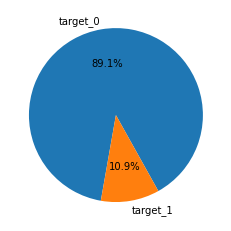

In [22]:
make_piechart(sub_mljar)

- score: 0.2455

In [7]:
sub_mljar_2['target'].value_counts()

1    41352
0     5052
Name: target, dtype: int64

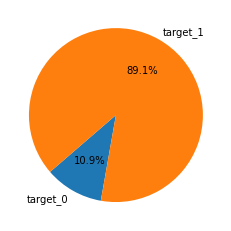

In [23]:
make_piechart(sub_mljar_2)

- score: 0.6145

In [30]:
result=pd.DataFrame(columns=['df','target_0','target_1','score'])
score_list=[0.4150, 0.4996, 0.2455, 0.6145]
name_list=['sub', 'sub_2', 'sub_mljar', 'sub_mljar_2']
sub_list=[sub, sub_2, sub_mljar, sub_mljar_2]
i=0

for df in sub_list:
  score=score_list[i]
  name=name_list[i]
  zero=len(df.loc[df['target']==0].index)
  one=len(df.loc[df['target']==1].index)
  result=result.append({'df':name, 'target_0':zero, 'target_1':one, 'score':score}, ignore_index=True)
  i+=1
result=result.sort_values('score', ascending=True)

In [31]:
result

,df,target_0,target_1,score
2,sub_mljar,41352,5052,0.2455
0,sub,36437,9967,0.4150
1,sub_2,29257,17147,0.4996
3,sub_mljar_2,5052,41352,0.6145


- target 1의 개수가 많아질 수록 점수도 같이 상승함

Train data의 target
--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [33]:
train=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/train.csv", parse_dates=["contents_open_dt"])

In [38]:
import warnings
warnings.filterwarnings('ignore')

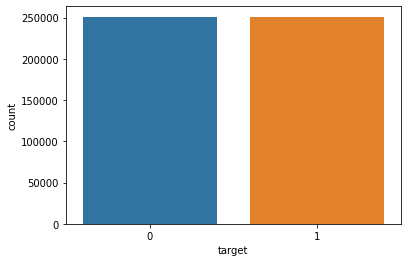

In [36]:
import seaborn as sns

sns.countplot(train['target'])

([<matplotlib.patches.Wedge at 0x7f4e00525c10>,
 [Text(-1.0831321475843978, 0.1918977615013026, 'target_0'),
  Text(1.0831321475843978, -0.19189776150130258, 'target_1')],
 [Text(-0.5907993532278533, 0.10467150627343777, '50.0%'),
  Text(0.5907993532278533, -0.10467150627343776, '50.0%')])

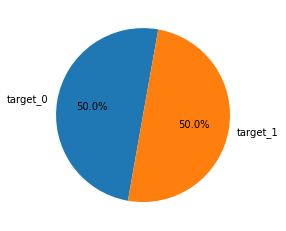

In [39]:
zero=len(train.loc[train['target']==0].index)
one=len(train.loc[train['target']==1].index)
ratio=[zero, one]
labels=['target_0', 'target_1']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)

# Highly unbalanced test data set and balanced training data in classification

https://stats.stackexchange.com/questions/57259/highly-unbalanced-test-data-set-and-balanced-training-data-in-classification

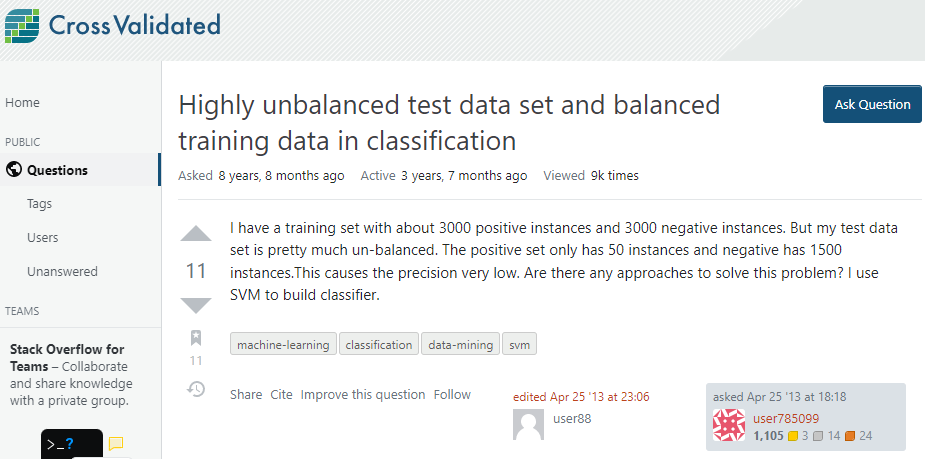

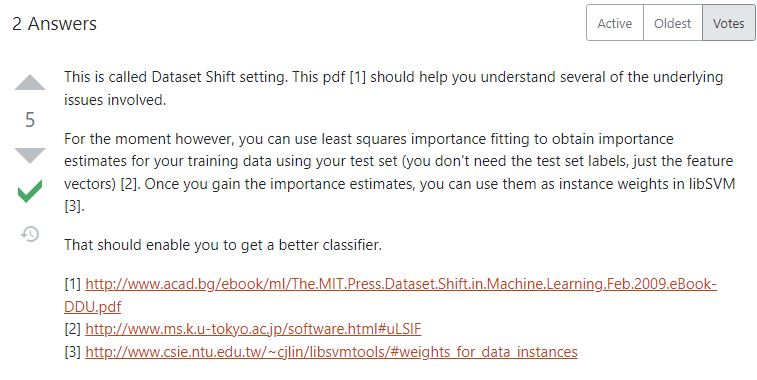

Dataset Shift
--

https://data-newbie.tistory.com/m/354

Understaning Data Shift

- https://towardsdatascience.com/understanding-dataset-shift-f2a5a262a766

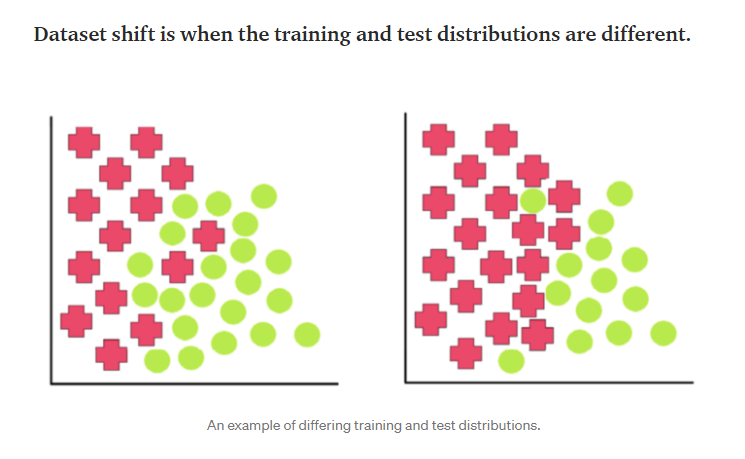

Covariate Shift - Unearthing hidden problems in Real World Data Science
--

- https://www.analyticsvidhya.com/blog/2017/07/covariate-shift-the-hidden-problem-of-real-world-data-science/

- train과 test의 target 불균형을 해결하는 방법을 찾는게 가장 중요할 것으로 판단 됨.

- train을 train과 validation로 나눌 때, validation에 의도적으로 unbalance sample을 만들어서, target이 0과 1의 불균형을 만들고 실험하는 것이 좋아보인다. 